# Heston Stochastic Volatility Model
------------------
> **Idriss Afra**

This project aims to implement the Heston model (1993) and apply it to price Equity Variance and Volatility Swaps.

## Model Dynamics
The Heston model is defined by the following pair of SDEs under the risk-neutral measure :   

\begin{equation}
\begin{split}
dS_t & = (r_t - q_t) \times S_t \times dt + \sqrt(V_t) \times S_t \times dW^S_t \\
dV_t & = κ (θ - V_t) dt + σ \sqrt(V_t) dW^V_t \\
d<W^S, W^V>_t & = ρ × dt
\end{split}
\end{equation}

Where :    
- $S_t$ is the stock or index price
- $r_t$ is the deterministic instantaneous forward interest rate
- $q_t$ is the deterministic instantaneous forward dividend yield
- $V_t$ is the stochastic spot's variance
- $κ$ is the rate of reversion to the long-term price variance
- $θ$ is the long-term price variance
- $σ$ is the volatility of the stochastic volatility $\sqrt(V_t)$
- $\left(W^S, W^V\right)$ are $ρ$-correlated standard brownian motions

The Heston model assumes a mean-reverting stochastic variance, giving more realistic volatility dynamics than Black-Scholes and often more plausible forward smile behavior than pure local volatility. This makes it useful for pricing longer-dated and forward-start options. In practice, calibration can be challenging because the objective is non-convex and the parameters are not uniquely identified, so fits can be unstable or fail to match some parts of the market surface.

---

## Heston Semi-Analytical Pricing of European Options

### The Fourier Inversion Theorem
This theorem links the cumulative distribution function $F_X$ to the characteristic function $ϕ_X$ :

\begin{equation}
\begin{split}
F_X(x) & = \frac{1}{2} - \frac{1}{2π} ∫_{-∞}^{+∞} \frac{e^{-iux} ϕ_X(u)}{iu} du\\
& = \frac{1}{2} - \frac{1}{2π} ∫_{-∞}^{+∞} Re\left(\frac{e^{-iux} ϕ_X(u)}{iu}\right) du \\
& = \frac{1}{2} - \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{e^{-iux} ϕ_X(u)}{iu} \right) du \\
\end{split}
\end{equation}

### The Characteristic Function
Let $X_t = log(S_t)$.

In this case : $dX_t = (r_t - q_t - \frac{V_t}{2})dt + \sqrt(V_t) dW^S_t$

Therefore, the characteristic function of $X_T$ is :    

$$
ϕ_{X_T}(u, t) = f\left(iu, t, X_t, V_t\right) = E^{RN}\left(e^{iuX_T} | X_t, V_t\right)
$$

$\left(ϕ_{X_T}(., t)\right)_{0 \le t \le T}$ is a Martingale by definition under the risk-neutral measure.

By applying Itô's lemma and setting the drift to zero, we get the following PDE under the risk-neutral measure :

$$
f_t' + \left(r_t - q_t - \frac{V_t}{2}\right)f_x' + κ (θ - V_t)f_v' + \frac{V_t}{2}f_{xx}'' + \frac{\sigma^2 V_t}{2}f_{vv}'' + σ V_t ρ f_{xv}'' = 0
$$

We also know that the characteristic function $\left(ϕ_{X_T}(., t)\right)_{0\le t \le T}$ takes an exponential affine form :

$$
ϕ_{X_T}(u, t) = f\left(iu, t, X_t, V_t\right) = e^{A(t, T) + B(t, T) X_t + C(t, T) V_t +iuX_t}
$$

With the terminal condition : $ϕ_{X_T}(u, T) = f\left(iu, T, x, v\right) = e^{iux}$

We plug this affine form into the PDE above and solve for the functions $A(t, T)$, $B(t, T)$, and $C(t, T)$ analytically :

\begin{equation}
\begin{split}
A(\tau) & = \left(\bar{r}_{t,T} - \bar{q}_{t,T}\right) i u \tau + \frac{κθ}{σ^2} \left(-(ρσiu - κ - M)τ -2log\left(\frac{1-Ne^{Mτ}}{1-N}\right) \right) \\
B(τ) & = 0 \\
C(τ) & = \frac{(e^{Mτ} - 1)(ρσiu - κ - M)}{σ^2 (1-Ne^{Mτ})} \\
\text{Where :} \\
τ & = T - t \\
\bar{r}_{t,T} & = \frac{1}{τ} \int_t^T r_u du \\
\bar{q}_{t,T} & = \frac{1}{τ} \int_t^T q_u du \\
M & = \sqrt{(ρσiu - κ)^2 + σ^2 (iu + u^2)} \\
N & = \frac{ρσiu - κ - M}{ρσiu - κ + M} \\
\end{split}
\end{equation}

### The Vanilla Option Price Formula
Under the risk-neutral measure, the price of a vanilla call option is :

\begin{equation}
\begin{split}
C_t(T, K) & = e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left( (S_T-K)^+ \right) \\
& = e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}S_T\right) - K e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}\right)
\end{split}
\end{equation}

Where :
\begin{equation}
\begin{split}
E^{RN}\left(1_{S_T>K}\right) & = P^{RN}\left(S_T>K\right) \\
& = 1 - F_{X_T}\left(log(K)\right) \\
& = \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu) }{iu}\right) du \\
\end{split}
\end{equation}

Using the Radon-Nikodym theorem, we express the first expectation under the underlying spot price measure:

\begin{equation}
\begin{split}
e^{-\bar{r}_{t,T} (T-t)} E^{RN}\left(1_{S_T>K}S_T\right) 
&= S_t \times e^{-\bar{q}_{t,T} (T-t)} \times E^{S}\left(1_{S_T>K}\right) \\
&= S_t \times e^{-\bar{q}_{t,T} (T-t)} \times P^{S}\left(S_T>K\right) \\
&= S_t \times e^{-\bar{q}_{t,T} (T-t)} \times \left(1 - F^{S}_{X_T}(log(K))\right) \\
&= S_t \times e^{-\bar{q}_{t,T} (T-t)} \times \left(  \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f^{S}(iu)}{iu}\right)du \right)\\
& = \frac{S_t e^{-\bar{q}_{t,T} (T-t)}}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu+1)}{iu}\right) du \\
\end{split}
\end{equation}

Where :
\begin{equation}
\begin{split}
f^{S}(iu) & = E^{S}_{t}\left(e^{iuX_T}\right) \\
&= \frac{e^{-\bar{r}_{t,T} (T-t)}}{S_t e^{-\bar{q}_{t,T} (T-t)}} \times E^{RN}_{t}\left( S_T e^{iuX_T}\right) \\
&= \frac{e^{-\bar{r}_{t,T} (T-t)}}{S_t e^{-\bar{q}_{t,T} (T-t)}} E^{RN}_{t}\left(e^{(1+iu)X_T}\right) \\
&= \frac{e^{-\bar{r}_{t,T} (T-t)}}{S_t e^{-\bar{q}_{t,T} (T-t)}} f(iu+1) \\
\end{split}
\end{equation}

Putting it all together, the call price becomes :

$$
C_t(T, K) = \frac{S_t e^{-\bar{q}_{t,T} (T-t)}}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu+1)}{iu}\right)du - K e^{-\bar{r}_{t,T} (T-t)} \left( \frac{1}{2} + \frac{1}{π} ∫_{0}^{+∞} Re\left(\frac{K^{-iu} f(iu)}{iu}\right) du  \right)
$$

To make the integration bounds finite, we apply a change of variable $x = e^{-u}$, which transforms the integrals into :

$$
C_t(T, K) = \frac{S_t e^{-\bar{q}_{t,T} (T-t)}}{2} + \frac{e^{-\bar{r}_{t,T} (T-t)}}{π} ∫_{0}^{1} Re\left(\frac{K^{ilog(x)} f(-ilog(x)+1)}{-ixlog(x)}\right)dx - K e^{-\bar{r}_{t,T} (T-t)} \left( \frac{1}{2} + \frac{1}{π} ∫_{0}^{1} Re\left(\frac{K^{ilog(x)} f(-ilog(x))}{-ixlog(x)}\right) dx  \right)
$$

Finally, put option prices can be derived from the call prices using put-call parity.

---

## Market Calibration of the Heston Stochastic Volatility Model
In order to use the Heston model, we need to set its five different parameters : $κ$, $θ$, $V_0$, $ρ$, and $σ$.

These parameters are calibrated by minimizing the following error function :    

$$
(\kappa, θ, V_0, ρ, σ) = ArgMin \left(∑_{i = 1}^M w_i \times |Price_{i}^{Heston}(\kappa, θ, V_0, ρ, σ) - Price_{i}^{Market}| \right)
$$

In practice, the weights $(w_i)_{1 \le i \le M}$ are determined based on Bid/Ask spreads, with higher weights assigned to more liquid options (those with tighter spreads).

For this project, we calibrate the Heston model using SciPy’s [Differential Evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html), with user-defined option weights applied in a weighted $L_1$ absolute-price error objective and a Feller non-linear constraint enforced during the search to promote strictly positive variance dynamics. 
<br>Runtime is managed through several controls: we temporarily relax the numerical integration settings used by quad during calibration and restore the original tolerances afterwards; we cap the optimizer to $80$ iterations with a popsize of $5$; we use a convergence tolerance of $5 \cdot 10^{-4}$; we disable the final polishing step; and we monitor progress with an early-stopping callback that halts as soon as the maximum relative pricing error across all options falls below $1\%$, with an additional safeguard cap after $50$ callback evaluations. 
<br>SciPy also supports parallel objective evaluations via the workers argument (e.g., setting $workers=-1$ to use all available CPU cores), which can significantly reduce wall-clock time on multi-core machines; however, we do not enable it here because the multiprocessing backend can be fragile in notebook environments due to process-spawning and pickling constraints, and may lead to hangs or unstable runs.


In [118]:
import cmath
import numpy as np
from scipy.integrate import quad
from scipy.optimize import differential_evolution, NonlinearConstraint
from multiprocessing.dummy import Pool as ThreadPool

# We ignore the differential_evolution warnings for display purposes
import warnings
warnings.filterwarnings("ignore")

# Vanilla Option Price under the Heston model (1993)
class heston_model:
    """
    The Heston model class.
    Speed tweaks:
      - Cache ln(S0), e^{-rT}, e^{-qT} in set_market_data.
      - Integration: memoize CF evaluations and ln(K) within each integral call.
      - Calibration uses differential_evolution with tuned hyperparameters + early stop.
    """

    def __init__(self, params=dict()):
        """
        Init Method : 
        params is a dict of Heston parameters : Kappa, Theta, Initial Variance, Volatility Of Volatility, Correlation.
        """
        self.params = params
        self.S0 = 0 # This will be used to detect if market data has not been set
        self.T = 0.0
        self.r = 0.0
        self.q = 0.0
        # cached market terms
        self._lnS0 = 0.0
        self._disc_r = 1.0
        self._disc_q = 1.0
        # small cache for ln(K)
        self._lnK_cache = {}
        # quad integration settings
        self._quad_espabs = 1e-6
        self._quad_epsrel = 1e-6
        self._quad_limit = 120
        print("The Heston model class was successfully initialized !")

    # ------------------------------------------------------------------
    # Market data / parameters
    # ------------------------------------------------------------------
    def set_market_data(self, S0, T, r, q=0):
        """
        Market Data Setter : Spot price S0, Expiry T, ZC Rate r, and ZC Div q.
        """
        # Core numeric validations
        if S0 <= 0: raise ValueError("Spot price S0 must be positive.")
        if T <= 0:  raise ValueError("Expiry T must be positive.")
        # Store attributes
        self.S0 = S0
        self.T = T
        self.r = r
        self.q = q
        self._lnS0 = np.log(self.S0)
        self._disc_r = np.exp(-self.r * self.T)
        self._disc_q = np.exp(-self.q * self.T)

    def set_params(self, params=dict()):
        """
        Heston parameters setter.
        """
        self.params = params
    
    def get_params(self):
        """
        Heston parameters getter.
        """
        if not self.params:
            print("Please run the Heston calibration first, using the params_calibration method.")
            return None
        return self.params

    def set_integration_settings(self, epsabs=1e-4, epsrel=1e-4, limit=80):
        """
        Set quad integration settings.
        epsabs : absolute error tolerance.
        epsrel : relative error tolerance.
        limit  : max number of subintervals.
        """
        self._quad_espabs = epsabs
        self._quad_epsrel = epsrel
        self._quad_limit = limit

    # ------------------------------------------------------------------
    # Helpers for integrals
    # ------------------------------------------------------------------
    def _get_lnK(self, K):
        """
        Get ln(K) with small caching.
        /!\ For internal use only
        """
        Kf = float(K)
        if Kf not in self._lnK_cache:
            self._lnK_cache[Kf] = np.log(Kf) # memoize strike log
        return self._lnK_cache[Kf]

    def _integral_1(self, params, K):
        """
        The first integration : quad on (0,1).
        /!\ For internal use only
        """
        lnK = self._get_lnK(K)
        # capture params as locals (no dict lookups in hot path)
        kappa = params["Kappa"]
        theta = params["Theta"]
        v0    = params["Initial Variance"]
        rho = params["Correlation"]
        sigma = params["Volatility Of Volatility"]
        sigma2 = sigma * sigma
        r = self.r; q = self.q; T = self.T; lnS0 = self._lnS0
        # tiny CF memo for repeated x points
        cf_cache = {}
        def cf_local(x):
            # characteristic func using captured locals
            L = rho * sigma * x
            M = cmath.sqrt((L - kappa)**2 + sigma2 * (x + (x / 1j)**2))
            N = (L - kappa - M) / (L - kappa + M)
            MT = M * T
            A = (r - q) * x * T + (kappa * theta / sigma2) * (
                -T * (L - kappa - M) - 2 * cmath.log((1 - N * cmath.exp(MT)) / (1 - N))
            )
            C = (cmath.exp(MT) - 1) * (L - kappa - M) / ((1 - N * cmath.exp(MT)) * sigma2)
            return cmath.exp(A + C * v0 + x * lnS0)
        def integrand(u):
            # integrand
            t = np.log(u)
            x = -1j * t + 1
            val_cf = cf_cache.get(x)
            if val_cf is None:
                val_cf = cf_local(x)
                cf_cache[x] = val_cf # memoize CF at this x
            denom = -1j * u * t
            return (np.exp(1j * lnK * t) * val_cf / denom).real
        # integration result
        return quad(integrand, 0, 1, epsabs=self._quad_espabs, epsrel=self._quad_epsrel, limit=self._quad_limit)[0]

    def _integral_2(self, params, K):
        """
        The second integration : quad on (0,1).
        /!\ For internal use only
        """
        lnK = self._get_lnK(K)
        # capture params as locals
        kappa = params["Kappa"]
        theta = params["Theta"]
        v0    = params["Initial Variance"]
        rho = params["Correlation"]
        sigma = params["Volatility Of Volatility"]
        sigma2 = sigma * sigma
        T = self.T; r = self.r; q = self.q; lnS0 = self._lnS0
        # tiny CF memo for repeated x points
        cf_cache = {}
        def cf_local(x):
            # characteristic func using captured locals
            L = rho * sigma * x
            M = cmath.sqrt((L - kappa)**2 + sigma2 * (x + (x / 1j)**2))
            N = (L - kappa - M) / (L - kappa + M)
            MT = M * T
            A = (r - q) * x * T + (kappa * theta / sigma2) * (
                -T * (L - kappa - M) - 2 * cmath.log((1 - N * cmath.exp(MT)) / (1 - N))
            )
            C = (cmath.exp(MT) - 1) * (L - kappa - M) / ((1 - N * cmath.exp(MT)) * sigma2)
            return cmath.exp(A + C * v0 + x * lnS0)
        def integrand(u):
            # integrand
            t = np.log(u)
            x = -1j * t
            val_cf = cf_cache.get(x)
            if val_cf is None:
                val_cf = cf_local(x)
                cf_cache[x] = val_cf # memoize CF at this x
            denom = -1j * u * t
            return (np.exp(1j * lnK * t) * val_cf / denom).real
        # integration result
        return quad(integrand, 0, 1, epsabs=self._quad_espabs, epsrel=self._quad_epsrel, limit=self._quad_limit)[0]

    # ------------------------------------------------------------------
    # Objective function
    # ------------------------------------------------------------------
    def _obj_and_max_rel_err(self, params, strikes, flavors, weights, prices):
        """
        Objective: L1 sum of price errors.
        params = [v0, theta, kappa, sigma, rho].
        /!\ For internal use only
        """
        # Init
        l1_error = 0.0
        max_rel_err = 0.0
        # unpack params into the dict used by pricing
        parameters = {
            "Initial Variance": params[0],
            "Theta": params[1],
            "Kappa": params[2],
            "Volatility Of Volatility": params[3],
            "Correlation": params[4],
        }
        disc_r = self._disc_r
        disc_q = self._disc_q
        for K, is_call, w, p_mkt in zip(strikes, flavors, weights, prices):
            I1 = self._integral_1(parameters, K)
            I2 = self._integral_2(parameters, K)
            p_fit = (
                0.5 * self.S0 * disc_q
                + disc_r * I1 / np.pi
                - K * disc_r * (0.5 + I2 / np.pi)
            )
            # Put from call/put parity if is_call is False
            p_fit = (
                p_fit
                if is_call
                else p_fit - self.S0 * disc_q + K * disc_r
            )
            # L1 error accumulation
            l1_error += w * abs(p_mkt - p_fit)
            # Relative error for early stopping
            if abs(p_mkt) > 1e-8:
                rel_err = abs(p_fit - p_mkt) / abs(p_mkt)
                if rel_err > max_rel_err:
                    max_rel_err = rel_err

        return l1_error, max_rel_err

    def _obj_func(self, params, strikes, flavors, weights, prices):
        """
        Objective: L1 sum of price errors.
        params = [v0, theta, kappa, sigma, rho].
        /!\ For internal use only
        """
        l1_error, _ = self._obj_and_max_rel_err(params, strikes, flavors, weights, prices)
        return l1_error
    # ------------------------------------------------------------------
    # Calibration method (differential evolution DE)
    # ------------------------------------------------------------------
    def params_calibration(self, strikes, flavors, weights, prices, max_rel_err_target=0.01, atm_vol=None):
        """
        Heston model calibration algorithm using differential_evolution.
        Early stop when all relative price errors are below 1% or after 50 local minimas.
        """
        quad_epsabs_backup = self._quad_espabs
        quad_epsrel_backup = self._quad_epsrel
        quad_limit_backup = self._quad_limit
        # Set looser integration settings for calibration speed
        self.set_integration_settings(epsabs=2e-4, epsrel=2e-4, limit=60)
        # Check market data set
        if self.S0 == 0:
            print("Please run set the market data first, using the set_market_data method.")
            return 0
        # Default bounds:
        bounds = (
            (0.0004, 0.09),   # V0   ∈ [2%^2 , 30%^2]
            (0.01,   0.09),   # Theta∈ [10%^2, 30%^2]
            (0.30,   4.0),    # Kappa
            (0.10,   1.00),   # Sigma
            (-0.85,  0.25),   # Rho
        )
        # If atm_vol given, adapt bounds based on the ATM variance
        if atm_vol is not None:
            atm_var = atm_vol ** 2
            bounds = (
                (0.5 * atm_var, 2.0 * atm_var),   # V0 based on atm variance
                (0.5 * atm_var, 3.0 * atm_var),   # Theta based on atm variance
                (0.10,          5.0),             # Kappa
                (0.10,          1.5),             # Sigma
                (-0.85,         0.25),            # Rho
            )
        # Feller constraint: 2*kappa*theta > sigma^2
        def constraint(params):
            return 2 * params[2] * params[1] - params[3] ** 2 - 1e-10
        nlc = NonlinearConstraint(constraint, 1e-10, np.inf)
        # DE callback for early stopping
        def debugger(params, convergence):
            """
            DE callback: compute max relative price error over all instruments.
            Stop when max_rel_err < max_rel_err_target.
            """
            obj_val, max_rel_err = self._obj_and_max_rel_err(
                params, strikes, flavors, weights, prices
            )
            debugger.counter += 1
            if debugger.counter % 5 == 0:
                print(
                    f"Iter {debugger.counter}: obj={obj_val:.4f}, "
                    f"max_rel_err={100*max_rel_err:.4f}%"
                )
            # early stop condition: all relative errors < max_rel_err_target
            if max_rel_err < max_rel_err_target:
                print(f"All option relative price errors are below {max_rel_err_target*100}% – stopping DE.")
                print(f"=> Iter {debugger.counter}: obj={obj_val:.4f}, max_rel_err={100*max_rel_err:.4f}%")
                return True
            # optional safety cap on iterations via callback:
            if debugger.counter >= 50:
                print("Reached 50 callback evaluations – stopping DE.")
                print(f"=> Iter {debugger.counter}: obj={obj_val:.4f}, max_rel_err={100*max_rel_err:.4f}%")
                return True
            return False
        debugger.counter = 0
        # Run the differential evolution calibration
        calibrated_params = differential_evolution(
            self._obj_func,
            args=(strikes, flavors, weights, prices),
            bounds=bounds,
            constraints=(nlc,),
            callback=debugger,
            maxiter=80,
            popsize=5,
            tol=5e-4,
            seed=0,
            polish=False
        )
        # Store calibrated parameters
        params = calibrated_params.x
        self.params = {
            "Initial Variance": params[0],
            "Theta": params[1],
            "Kappa": params[2],
            "Volatility Of Volatility": params[3],
            "Correlation": params[4],
        }
        # Restore quad integration settings
        self.set_integration_settings(
            epsabs=quad_epsabs_backup,
            epsrel=quad_epsrel_backup,
            limit=quad_limit_backup
        )
        print("The Heston model was successfully calibrated !")
        return calibrated_params
    
    # ------------------------------------------------------------------
    # Vanilla pricing
    # ------------------------------------------------------------------
    def vanilla_price(self, K, isCall=True, params=None):
        """
        The vanilla option price under the Heston model.
        The Put prices are deduced from the Call / Put parity.
        If params is None, uses self.params.
        """
        if self.S0 == 0:
            print("Please run set the market data first, using the set_market_data method.")
            return 0
        # choose parameter set
        if params is None:
            if not bool(self.params):
                print("Please run the Heston calibration first, using the params_calibration method.")
                return 0
            params = self.params
        disc_q = self._disc_q
        disc_r = self._disc_r
        call_price = (
            0.5 * self.S0 * disc_q
            + disc_r * self._integral_1(params, K) / np.pi
            - K * disc_r * (0.5 + self._integral_2(params, K) / np.pi)
        )
        return call_price if isCall else call_price - self.S0 * disc_q + K * disc_r

---

## Black–Scholes Reference Model

In [119]:
from scipy.stats import norm

class bs_model :
    """
    The Black-Scholes model class.
    """
    def __init__(self):
        self.S0 = 0 # To detect if market data has not been set
        print("The Black-Scholes model class was successfully initialized !")
    
    def set_market_data(self, S0, T, r, q=0):
        """
        Market Data Setter : Spot price S0, Expiry T, ZC Rate r, and ZC Div q.
        """
        self.S0 = S0
        self.T = T
        self.r = r
        self.q = q
    
    def vanilla_price(self, K, vol, isCall) :
        """
        The vanilla option price under the Black-Scholes model.
        """
        if self.S0 == 0 : 
            print("Please run set the market data first, using the set_market_data method.")
            return 0
        v2T = vol**2 * self.T
        d1 = (np.log(self.S0 / K) + (self.r - self.q) * self.T + v2T / 2) / v2T**0.5
        d2 = d1 - v2T**0.5
        phi = 1 if isCall else  -1
        return phi * (self.S0 * np.exp(-self.q * self.T) * norm.cdf(phi * d1) - K * np.exp(-self.r * self.T) * \
                      norm.cdf(phi * d2))

    def vanilla_fwd_price(self, K, vol, isCall) :
        """
        The vanilla option price under the Black-Scholes model.
        """
        if self.S0 == 0 : 
            print("Please run set the market data first, using the set_market_data method.")
            return 0
        v2T = vol**2 * self.T
        fwd = self.S0 * np.exp((self.r - self.q) * self.T)
        d1 = (np.log(fwd / K) + v2T / 2) / v2T**0.5
        d2 = d1 - v2T**0.5
        phi = 1 if isCall else  -1
        return phi * (fwd * norm.cdf(phi * d1) - K * norm.cdf(phi * d2))

    def exercise_probability(self, K, vol, isCall):
        """
        Computes the exercise probability under the Black-Scholes model.
        """
        if self.S0 == 0 : 
            print("Please run set the market data first, using the set_market_data method.")
            return 0
        v2T = vol**2 * self.T
        d1 = (np.log(self.S0 / K) + (self.r - self.q) * self.T + v2T / 2) / v2T**0.5
        d2 = d1 - v2T**0.5
        phi = 1 if isCall else  -1
        return norm.cdf(phi * d2)

As a first validation step, we verify that Heston reproduces Black–Scholes prices in the appropriate limit :

In [120]:
# Degenerated Test
S0, K, T, r, q, sigma, isCall = 100, 90, 1, 0.015, 0.005, 0.2, False
print("The test case : Put option with Spot={}, K={}, T={}, r={}, q={}, and vol={}".format(S0, K, T, r, q, sigma))
print("To match Heston and Black models, we set the following parameter values : ")
params = {"Kappa" : 0, "Theta" : round(sigma**2, 2), "Initial Variance" : round(sigma**2, 2), 
          "Correlation" : 0, "Volatility Of Volatility" : 0.000001}
print(params)
print("-----------------------------------------------------------------------------------------------------------")

# B&S Model
black = bs_model()
black.set_market_data(S0, T, r, q)
print("The Black price : {:.4f}".format(black.vanilla_price(K, sigma, isCall)))

# Heston Model
heston = heston_model(params)
heston.set_market_data(S0, T, r, q)
print("The Heston price : {:.4f}".format(heston.vanilla_price(K, isCall)))

The test case : Put option with Spot=100, K=90, T=1, r=0.015, q=0.005, and vol=0.2
To match Heston and Black models, we set the following parameter values : 
{'Kappa': 0, 'Theta': 0.04, 'Initial Variance': 0.04, 'Correlation': 0, 'Volatility Of Volatility': 1e-06}
-----------------------------------------------------------------------------------------------------------
The Black-Scholes model class was successfully initialized !
The Black price : 3.2810
The Heston model class was successfully initialized !
The Heston price : 3.2810


---

## Application : CAC40 Listed Index Options

We now calibrate the Heston model to CAC40 option market data. We use the implied forward and implied volatility quotes observed on 12 February 2025, computed in the companion notebook: [Equity Implied Forward & Volatility Surface](https://github.com/Idriss-Afra/Equity-Implied-Volatility-Surface/blob/main/Equity%20Implied%20Forward%20%26%20Volatility%20Surface.ipynb).

Since traded equity variance and volatility swaps typically have maturities shorter than one year, we focus on the 10-month listed expiry :

In [121]:
import datetime
from scipy.interpolate import interp1d

as_of_date = datetime.date(2025, 2, 12)

# Spot Price
S0 = 8042.19

"""
/!\ FYI : If the expiry is not listed, calibration should be done on the adjacent listed 
expiries, with final Heston parameters interpolated from their results.
"""
# Listed expiry
exp_date = datetime.date(2025, 12, 19)
T = (exp_date - as_of_date).days / 365.

# Interpolated ZC Rate based on the EURIBOR-6M
zc_rate = 2.3628 / 100

# Implied Data
fwd = 8003.0037
zc_div = zc_rate - np.log(fwd / S0) / T
market_strikes = np.array([7800.0, 7850.0, 7900.0, 7950.0, 8000.0, 8050.0, 8100.0, 8150.0, 8200.0, 8300.0, 8400.0])
market_flavors = np.array([(K > fwd) for K in market_strikes])
market_prices = np.array([363.16, 380.34, 399.09, 418.95, 439.89, 415.51, 389.91, 364.6, 340.38, 294.89, 253.61])
implied_vols = np.array([0.1602, 0.1582, 0.1564, 0.1548, 0.1532, 0.1516, 0.1503, 0.1488, 0.1474, 0.1447, 0.1422])

Selecting the calibration basket is critical, since it drives both calibration stability and runtime. For equities and equity indices, we prioritize OTM puts to capture downside skew and tail risk, while avoiding very deep strikes and keeping the set reasonably close to ATM to improve numerical stability and reduce sensitivity to wing noise :

In [122]:
# 1 - Data Cleaning & Filtering  :
def clean_data(forward, strikes, vols, min_moneyness = 0.75, max_moneyness = 1.25, min_exercise_proba=0.1, 
               max_exercise_proba=0.9):
    """
    Cleans the data before Heston calibration to ensure its efficiency and redue its duration.
    The filters are based on moneyness and execise probabilities.
    """
    keep_index = [i for i in range(len(strikes)) if 
                 (strikes[i] / forward >= min_moneyness) and (strikes[i] / forward <= max_moneyness) and
                 black.exercise_probability(strikes[i], vols[i], strikes[i] > forward) >= min_exercise_proba and 
                 black.exercise_probability(strikes[i], vols[i], strikes[i] > forward) <= max_exercise_proba]
    nb_cleaned_data = len(strikes) - len(keep_index)
    word = " was " if nb_cleaned_data == 1 else "s were "
    if nb_cleaned_data > 0: 
        print("/!\ Warning : " + str(nb_cleaned_data) + " strike" + word + "filtered : ",\
                                   [strikes[i] for i in range(len(strikes)) if i not in keep_index])
    else:
        print("/!\ Warning : No strike was filtered.")
    return keep_index

black.set_market_data(S0, T, zc_rate, zc_div) # Reset The B&S model market data
filtered_index = clean_data(fwd, market_strikes, implied_vols)

# 2 - Data Sampling :
step = 1 # => Sampling Frequency
filtered_index = [i for i in filtered_index if i % step == 0]
filtered_strikes = np.array([market_strikes[i] for i in filtered_index])
filtered_flavors = np.array([market_flavors[i] for i in filtered_index])
filtered_prices = np.array([market_prices[i] for i in filtered_index])
filtered_vols = np.array([implied_vols[i] for i in filtered_index])
weights = np.array([1] * len(filtered_strikes))
weights = weights / np.sum(weights)

/!\ Warning : No strike was filtered.


We calibrate the Heston parameters on the filtered market data :

In [123]:
import timeit

heston = heston_model(params)
heston.set_market_data(S0, T, zc_rate, zc_div)
print()

print("Heston Calibration : ")
print("---------------------------------------------------------------")
start = timeit.default_timer()
heston.params_calibration(filtered_strikes, filtered_flavors, weights, filtered_prices)
stop = timeit.default_timer()
print("---------------------------------------------------------------")
print("End of calibration after : {:.2f}s".format(stop - start))
print("---------------------------------------------------------------")
print("Calibration Results : ")

for key in heston.params.keys():
    if key == "Kappa":
        print("Calibrated {} : {:.2f}".format(key, heston.params[key]))
    else:
        print("Calibrated {} : {:.2f}%".format(key, 100 * heston.params[key]))

The Heston model class was successfully initialized !

Heston Calibration : 
---------------------------------------------------------------
Iter 5: obj=8.9779, max_rel_err=6.0301%
Iter 10: obj=1.5730, max_rel_err=1.6974%
Iter 15: obj=1.5730, max_rel_err=1.6974%
All option relative price errors are below 1.0% – stopping DE.
=> Iter 16: obj=1.3196, max_rel_err=0.5449%
The Heston model was successfully calibrated !
---------------------------------------------------------------
End of calibration after : 69.42s
---------------------------------------------------------------
Calibration Results : 
Calibrated Initial Variance : 2.27%
Calibrated Theta : 3.20%
Calibrated Kappa : 1.79
Calibrated Volatility Of Volatility : 33.24%
Calibrated Correlation : -75.10%


Then, evaluate  the accuracy of our calibration :

Market Prices vs Heston Calibrated Prices :
---------------------------------------------
Flavor :  False
Strike :  7800.0
Market Price :  363.16
Heston Price :  361.04
Calibration Error : 0.58%
---------------------------------------------
Flavor :  False
Strike :  7850.0
Market Price :  380.34
Heston Price :  379.89
Calibration Error : 0.12%
---------------------------------------------
Flavor :  False
Strike :  7900.0
Market Price :  399.09
Heston Price :  399.55
Calibration Error : 0.11%
---------------------------------------------
Flavor :  False
Strike :  7950.0
Market Price :  418.95
Heston Price :  420.02
Calibration Error : 0.25%
---------------------------------------------
Flavor :  False
Strike :  8000.0
Market Price :  439.89
Heston Price :  441.31
Calibration Error : 0.32%
---------------------------------------------
Flavor :  True
Strike :  8050.0
Market Price :  415.51
Heston Price :  417.39
Calibration Error : 0.45%
---------------------------------------------
Flavo

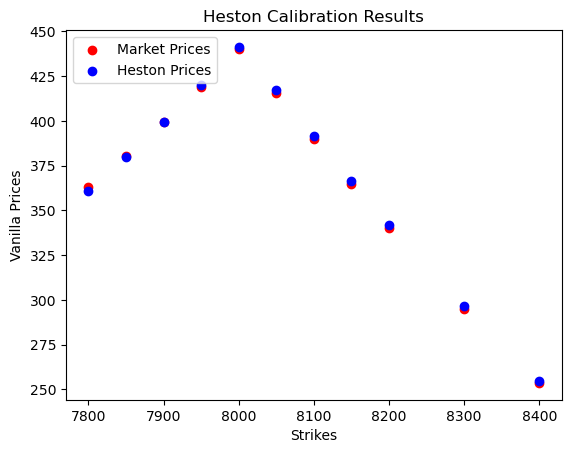

In [124]:
import matplotlib.pyplot as plt

print("Market Prices vs Heston Calibrated Prices :")
print("---------------------------------------------")

heston_prices = []
for j in range(len(filtered_strikes)) :
    heston_price = heston.vanilla_price(filtered_strikes[j], filtered_flavors[j])
    heston_prices.append(heston_price)
    market_price = filtered_prices[j]
    print("Flavor : ", filtered_flavors[j])
    print("Strike : ", filtered_strikes[j])
    print("Market Price : ", round(market_price, 2))
    print("Heston Price : ", round(heston_price, 2))
    print("Calibration Error : {:.2f}%".format(100 * abs(heston_price / market_price -1)))
    print("---------------------------------------------")

plt.title("Heston Calibration Results")
plt.ylabel("Vanilla Prices")
plt.xlabel("Strikes")
plt.scatter(filtered_strikes, filtered_prices, color="red", label="Market Prices")
plt.scatter(filtered_strikes, heston_prices, color="blue", label="Heston Prices")
plt.legend(loc="upper left")
plt.show()

The calibrated Heston parameters provide a coherent picture of the CAC40 options market on 12 Feb 2025, consistent with a relatively calm and low-vol environment for European equities. The initial variance ($v_0 \approx 2.27\%$) implies a current spot volatility around $15\%$, in line with the ATM-vol level and the low-vol regime. The long-run variance ($\theta \approx 3.20\%$) corresponds to a long-run volatility near $18\%$, indicating the market was pricing a moderate drift upward in variance over the $10$-month horizon rather than a sharp regime change. The mean-reversion speed ($\kappa \approx 1.79$) implies a variance half-life of roughly $4$-$5$ months, so variance is expected to adjust at a moderate pace toward its long-run level.
<br>The volatility of volatility ($\sigma \approx 33.24\%$) suggests a meaningful, but not extreme, degree of stochastic variance fluctuations, supporting smile curvature and some tail risk. The strongly negative correlation ($\rho \approx -75.10\%$) captures a material downside skew and the equity leverage effect, consistent with larger implied moves on sell-offs coinciding with volatility increases. <br>Overall, if the fit remains tight (e.g., pricing errors below about $1\%$ across strikes), the calibration can be viewed as financially meaningful and internally consistent.

Now, let's use the Heston model to price two well-known volatility instruments: Variance and Volatility Swaps.

---

## Equity Variance Swap Pricing
The Fair Variance Strike $K_{Var}$ is defined as : $\frac{1}{T}∫_0^TE(V_t)dt$, where $(V_t)_{t \ge 0}$ is the stochastic variance of the spot price.

### The Market Model (Replication Method)
In practice, variance swaps are typically priced via static replication: the fair variance strike is obtained by integrating a strip of OTM call and put option prices across strikes.

Given : $dlog(S_t) = \left( r_t - q_t - \frac{V_t}{2} \right)dt + \sqrt{V_t}dW_t = \frac{dS_t}{S_t} - \frac{V_t}{2} dt$

Then : $\frac{1}{2}∫_0^T V_t dt = ∫_0^T \frac{dS_t}{S_t} - log\left(\frac{S_T}{S_0}\right)$

Thus :

\begin{equation}
\begin{split}
\frac{1}{2}∫_0^T E(V_t) dt & = ∫_0^T E\left(\frac{dS_t}{S_t}\right) - E\left(log\left(\frac{S_T}{S_0}\right)\right) \\
&= ∫_0^T (r_t - q_t) dt - E\left(log\left(\frac{S_T}{S_0}\right)\right) \\
&= - E\left(log\left(\frac{S_T}{F_{0,T}}\right)\right) \\
\end{split}
\end{equation}

Where : $F_{0,T} = S_0 \times e^{(∫_0^T (r_t - q_t) dt)}$ is the forward price up to $T$

Finally, using the Carr-Madan replication method, we get the following expression for the Fair Variance Strike:

$$
K_{Var} = \frac{2}{T} \times \left( ∫_0^{F_{0,T}} \frac{1}{K^2} Put_{Vanilla}(K)dK + ∫_{F_{0,T}}^{+∞} \frac{1}{K^2} Call_{Vanilla}(K)dK \right)
$$

### The Heston Model
Under the Heston model, the Fair Variance is computed analytically. Since:

$$
V_T = V_0 + ∫_0^Tκ(θ - V_t)dt+∫_0^Tσ\sqrt(V_t) dW^V_t
$$

We have :
$$
E(V_T) = V_0 + κθT - κ∫_0^T E(V_t)dt
$$

This leads to the following ODE :          
$$
\frac{dE(V_T)}{dT} = κθ - κE(V_T)
$$

The solution to this ODE is :    
$$
E(V_T) = θ + (V_0 - θ) e^{-κT}
$$

Therefore, the Fair Variance Strike is :
$$
K_{Var} = \frac{1}{T} ∫_0^T E(V_T) = \frac{1 - e^{-κT}}{κT} V_0 + \left(1 - \frac{1 - e^{-κT}}{κT}\right) θ
$$


In [ ]:
# 1 - Market Implied Skew : Linear Interpolation / Extrapolation
_skew = interp1d(market_strikes, implied_vols, kind="linear", fill_value="extrapolate")
def skew(k): 
    return float(_skew(k))

# 2 - Fair Variance Strike by Replication
def fair_var_strike_replication(wing_buffer=0.25):
    """
    The Fair Var Strike by Replication.
    """
    otm_put = lambda k : black.vanilla_fwd_price(k, skew(k), False) / k**2
    otm_call = lambda k : black.vanilla_fwd_price(k, skew(k), True) / k**2
    # Integration bounds : Best to avoid very deep strikes to reduce sensitivity to wing noise and extrapolated non-quoted vols
    lower_bound = market_strikes[0] * (1 - wing_buffer)
    upper_bound = market_strikes[-1] * (1 + wing_buffer)
    # Final Fair Variance Strike :
    return (2 / T) * (quad(otm_put, lower_bound, fwd)[0] + quad(otm_call, fwd, upper_bound)[0])

# 3 - Fair Variance Strike by Heston
def fair_var_strike_heston(params):
    """
    The Heston Fair Var Strike.
    """
    # Heston parameters :
    kappa = params["Kappa"]
    theta = params["Theta"]
    v0 = params["Initial Variance"]
    # Intermediate parameters :
    K_T = kappa * T
    exp_K_T = (1 - np.exp(- K_T)) / K_T
    # Final Fair Variance Strike :
    return v0 * exp_K_T + theta * (1 - exp_K_T)

fair_var_replication = fair_var_strike_replication()
print("The Fair Variance Strike (Replication) up to {} is : {:.2f}%".format(exp_date, 100*fair_var_replication))
fair_var_heston = fair_var_strike_heston(heston.params)
print("The Fair Variance Strike (Heston) up to {} is : {:.2f}%".format(exp_date, 100 * fair_var_heston))
print("=> The Difference between Heston & Replicated Fair Variance Strikes is : {:.2f}%".format(
       100*abs(fair_var_replication-fair_var_heston)))

The Fair Variance Strike (Replication) up to 2025-12-19 is : 2.71%
The Fair Variance Strike (Heston) up to 2025-12-19 is : 2.72%
=> The Difference between Heston & Replicated Fair Variance Strikes is : 0.01%


---

## Equity Volatility Swap Pricing
The Fair Volatility Strike $K_{Vol}$ is defined by : $E\left(\sqrt{∫_0^T\frac{1}{T}V_t dt}\right)$, where $(V_t)_{t \ge 0}$ is the stochastic spot's variance.

### Volatility Convexity Adjustment
Since the square root function is concave, the Jensen inequality gives the following result :    

$$
K_{Vol} = E\left(\sqrt{∫_0^T\frac{1}{T}V_t dt}\right) \le  \sqrt{E\left(∫_0^T\frac{1}{T}V_t dt\right)} = \sqrt{K_{Var}}
$$

Therefore, $∃VolConvAdj \le 0$ such as :    
$$
K_{Vol} = \sqrt{K_{Var}} + VolConvAdj
$$

### The Heston Model
A semi-analytical price of Volatility Swaps is possible under the Heston model thanks to the following equality :

$$
\sqrt{v} = \frac{1}{2 \sqrt{\pi}} ∫_{0}^{+∞} \frac{1 - e^{-xv}}{x^{1.5}}dx
$$

In fact :

$$
K_{Vol} = \frac{1}{2 \sqrt{\pi T}} ∫_{0}^{+∞} \frac{1 - E\left(e^{-x ∫_0^T V_t dt}\right)}{x^{1.5}}dx
$$

Defining $r_t = x V_t$, we have :

\begin{equation}
\begin{split}
dr_t & = xdV_t \\
&= κ (xθ - r_t) dt + \sqrt{x} σ \sqrt{r_t} dW^V_t \\
&= κ (θ' - r_t) dt + σ' \sqrt{r_t} dW^V_t \\
\end{split}
\end{equation}

Where : $θ'=xθ$ and $σ'=\sqrt{x} σ$

Therefore, $(r_t)_{t \ge 0}$ follows the Cox-Ingersoll-Ross (CIR) model (similar to $(V_t)_{t \ge 0}$)

As such, the expectection $E\left(e^{-x ∫_0^T V_t dt}\right)$ is nothing but the zero-coupon price under the CIR model. For $x \ge 0$ :

$$
E\left(e^{-x ∫_0^T V_t dt}\right) = E\left(e^{-∫_0^T r_t dt}\right) = e^{A - B \times r_0} = e^{A - B V_0 x}
$$

Where :

\begin{equation}
\begin{split}
g(x) & = \sqrt{\kappa^2 + 2x σ^2} \\
B(x) & = \frac{2 \left( 1 - e^{-g(x)T} \right)}{\left(g(x)+\kappa\right)\left(1-e^{-g(x)T}\right)+2g(x)e^{-g(x)T}} \\
A(x) & = \frac{\kappa\theta}{\sigma^2} \times \left( \left(\kappa + g(x)\right)T - 2 log\left( 1 + \frac{\left( g(x) + \kappa \right) \left( e^{g(x)T} - 1 \right)}{2g(x)} \right) \right)
\end{split}
\end{equation}

In summary, the annulized expected volatility is given by the integration :

$$
K_{Vol} = \frac{1}{2\sqrt{\pi T}} ∫_{0}^{+∞}\frac{1 - e^{A(x)-B(x)xV_0}}{x^{1.5}}dx
$$

We perform a change of variable $x' = \frac{x}{1-x}$ to get finite boundaries in the integration :

$$ 
K_{Vol} = \frac{1}{2\sqrt{\pi T}} \int_{0}^{1} \frac{1 - e^{A\left(\frac{x'}{1-x'}\right) - B\left(\frac{x'}{1-x'}\right)\frac{x'}{1-x'}V_0}}{(x')^{1.5}(1-x')^{0.5}} \, dx' 
$$

In [126]:
def fair_vol_strike_heston(params):
    """
    The Heston Fair Vol Strike.
    """
    # Heston parameters :
    kappa = params["Kappa"]
    theta = params["Theta"]
    v0 = params["Initial Variance"]
    sigma = params["Volatility Of Volatility"]
    # Intermediate functions :
    g = lambda x : np.sqrt(kappa**2 + 2 * x * sigma**2)
    B = lambda x : 2 * (1 - np.exp(-g(x) * T)) / ((g(x) + kappa) * (1 - np.exp(-g(x) * T)) + 2 * g(x) * np.exp(-g(x) * T))
    A = lambda x : (kappa * theta / sigma**2) * (
                   (kappa + g(x)) * T - 2 * np.log(1 + (g(x) + kappa) * (np.exp(g(x) * T) - 1) / (2 * g(x))))
    # Main function :
    f = lambda x : (1 - np.exp(A(x / (1-x)) - B(x / (1-x)) * x * v0 / (1-x))) / (x**1.5 * (1-x)**0.5)
    # Final Fair Volatility Strike :
    return quad(f, 0, 1)[0] / (2 * np.sqrt(np.pi * T))

fair_vol_heston = fair_vol_strike_heston(heston.params)
print("The Fair Volatility Strike (Heston) up to {} is : {:.2f}%".format(exp_date, 100 * fair_vol_heston))
print("The Square-Root of the Fair Variance Strike (Heston) up to {} is : {:.2f}%".format(
       exp_date, 100 * np.sqrt(fair_var_heston)))
print("=> The Convexity Adjustment up to {} is : {:.2f}%".format(
       exp_date, 100 * (fair_vol_heston - np.sqrt(fair_var_heston))))

The Fair Volatility Strike (Heston) up to 2025-12-19 is : 15.76%
The Square-Root of the Fair Variance Strike (Heston) up to 2025-12-19 is : 16.50%
=> The Convexity Adjustment up to 2025-12-19 is : -0.73%
